# Varying gNa+

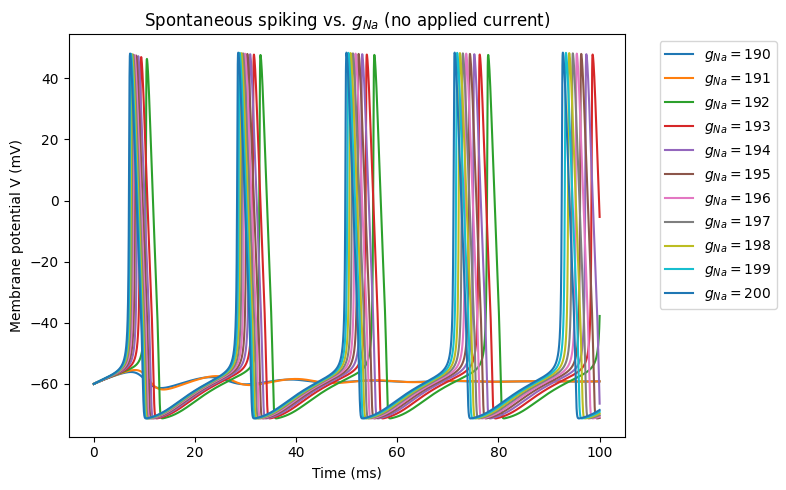

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# ---- 1) Model parameters ----
C       = 1.0    # μF/cm²
gbar_K  = 36.0   # mS/cm²
# gbar_Na = 120.0  # mS/cm²
g_leak=0.3   # mS/cm²
E_K     = -72.0  # mV
E_Na    = 55.0   # mV
E_leak  = -49.0  # mV

# ---- 2) Rate constants α and β ----
def alpha_n(V):
    return 0.01*(V + 50.0) / (1.0 - np.exp(-(V + 50.0)/10.0))

def beta_n(V):
    return 0.125 * np.exp(-(V + 60.0)/80.0)

def alpha_m(V):
    return 0.1*(V + 35.0) / (1.0 - np.exp(-(V + 35.0)/10.0))

def beta_m(V):
    return 4.0 * np.exp(-(V + 60.0)/18.0)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 60.0)/20.0)

def beta_h(V):
    return 1.0 / (1.0 + np.exp(-(V + 30.0)/10.0))

# ---- 3) Steady-states and time-constants from α+β ----
def n_inf(V):
    an = alpha_n(V); bn = beta_n(V)
    return an / (an + bn)

def tau_n(V):
    an = alpha_n(V); bn = beta_n(V)
    return 1.0 / (an + bn)

def m_inf(V):
    am = alpha_m(V); bm = beta_m(V)
    return am / (am + bm)

def tau_m(V):
    am = alpha_m(V); bm = beta_m(V)
    return 1.0 / (am + bm)

def h_inf(V):
    ah = alpha_h(V); bh = beta_h(V)
    return ah / (ah + bh)

def tau_h(V):
    ah = alpha_h(V); bh = beta_h(V)
    return 1.0 / (ah + bh)

# ---- 4) Stimulus current I_app(t) ----
def I_app(t):
    return 0.0

# ---- 5) The HH ODE system ----
# State vector y = [ V, n, m, h ]


def hh_rhs(y, t, gNa_val):
    V, n, m, h = y
    # gating:
    dn = (n_inf(V) - n) / tau_n(V)
    dm = (m_inf(V) - m) / tau_m(V)
    dh = (h_inf(V) - h) / tau_h(V)
    # conductances:
    gK  = gbar_K * n**4
    gNa = gNa_val  * m**3 * h
    Ileak = g_leak * (V - E_leak)
    # currents:
    IK  = gK  * (V - E_K)
    INa = gNa * (V - E_Na)
    dV = (I_app(t) - IK - INa - Ileak) / C
    return [dV, dn, dm, dh]

# Sweep gbar_Na from 190 to 200
gbar_Na_list = np.arange(190.0, 201.0, 1.0)
t  = np.linspace(0, 100, 5001)
V0 = -60.0
y0 = [V0, n_inf(V0), m_inf(V0), h_inf(V0)]

plt.figure(figsize=(8,5))
for gNa_val in gbar_Na_list:
    sol = odeint(hh_rhs, y0, t, args=(gNa_val,))
    plt.plot(t, sol[:,0], label=f'$g_{{Na}}={gNa_val:.0f}$')

plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential V (mV)')
plt.title('Spontaneous spiking vs. $g_{Na}$ (no applied current)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()



# Varying gK+

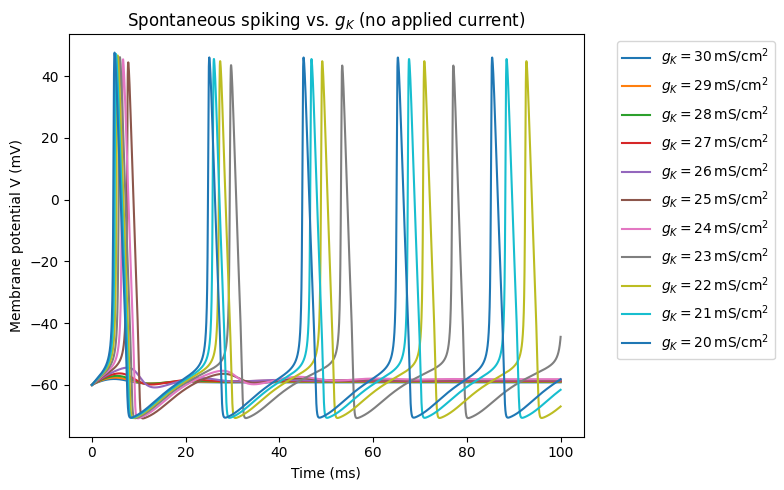

In [21]:
C, gbar_Na, g_leak = 1.0, 120.0, 0.3
E_K, E_Na, E_leak   = -72.0, 55.0, -49.0
def I_app(t):
    return 0.0  # no applied current

def hh_rhs(y, t, gbar_K_val):
    V, n, m, h = y
    # gating:
    dn = (n_inf(V) - n) / tau_n(V)
    dm = (m_inf(V) - m) / tau_m(V)
    dh = (h_inf(V) - h) / tau_h(V)
    # conductances:
    gK   = gbar_K_val * n**4
    gNa  = gbar_Na* m**3 * h
    Ileak = g_leak * (V - E_leak)
    # currents:
    IK   = gK   * (V - E_K)
    INa  = gNa  * (V - E_Na)
    dV   = (I_app(t) - IK - INa - Ileak) / C
    return [dV, dn, dm, dh]

# ---- Sweep g_K ----
gbar_K_list = np.arange(30.0, 19.0, -1.0)
t = np.linspace(0, 100, 5001)
V0 = -60.0
y0 = [V0, n_inf(V0), m_inf(V0), h_inf(V0)]

plt.figure(figsize=(8,5))
for gK_val in gbar_K_list:
    sol = odeint(hh_rhs, y0, t, args=(gK_val,))
    plt.plot(t, sol[:,0], label=f'$g_{{K}}={gK_val:.0f}\\,$mS/cm$^2$')

plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential V (mV)')
plt.title('Spontaneous spiking vs. $g_{K}$ (no applied current)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()